In [4]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline
# Calculate accuracy metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import seaborn as sns

# Load your dataset
df = pd.read_csv('filtered_nn_data.csv')
df = df[['date', 'orders']]
df.columns = ['ds', 'y']
df['y'] = df['y'].astype(str)
df['ds'] = pd.to_datetime(df['ds'])
df['y'] = df['y'].astype('Int64')

fore_df = pd.read_csv('aug_sept_data.csv')
fore_df = fore_df[['date', 'orders']] 
fore_df.rename(columns={'date': 'ds', 'orders': 'y'}, inplace=True)
fore_df['y'] = fore_df['y'].str.replace(',', '', regex=True)
fore_df['y'] = fore_df['y'].astype('Int64')
fore_df['ds'] = pd.to_datetime(fore_df['ds'])

main_df = pd.read_csv('main_data.csv')
main_df.rename(columns={'date': 'ds', 'orders': 'y'}, inplace=True)

#Combined dataframe
combined_df = pd.concat([df,fore_df], ignore_index=True)

#Train-test split
train1, test1 =  main_df[1: main_df.shape[0]-57],  main_df[ main_df.shape[0]-57:]



In [5]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ds          783 non-null    object
 1   y           783 non-null    int64 
 2   uv          783 non-null    int64 
 3   day_binary  783 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 24.6+ KB


In [6]:
fore_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      35 non-null     datetime64[ns]
 1   y       35 non-null     Int64         
dtypes: Int64(1), datetime64[ns](1)
memory usage: 727.0 bytes


Testing Model


Model for forecasting sept data

In [7]:

model2=Prophet(changepoint_prior_scale=0.08,  
    seasonality_prior_scale=50.0, holidays_prior_scale=0.1)
# model2.add_regressor('uv')
# model2.add_regressor('uv')
model2.fit(train1)

future_data = test1[['ds']]

# Make predictions for the last 20 data points
prediction2 = model2.predict(future_data)

pred2= prediction2['yhat'].copy()
test1 = test1.reset_index(drop=True)
test1['pred2'] = pred2.copy()
# # Create a line plot for the four lines
# sns.set_style("whitegrid")  # Optional: Set the style
# plt.figure(figsize=(10, 6))  # Optional: Set the figure size

# # Plot the lines     'ord','auto_pred1','auto_pred3','auto_pred4',
# sns.lineplot(data=test1[['y', 'pred2']], dashes=False)


23:03:10 - cmdstanpy - INFO - Chain [1] start processing
23:03:11 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
test1

,ds,y,uv,day_binary,pred2
0,2023-08-01,10408,211130,1,10436.325482
1,2023-08-02,11121,214472,10,10557.562139
2,2023-08-03,10644,208972,11,10294.991865
3,2023-08-04,9407,208616,100,10025.765965
4,2023-08-05,9386,208115,101,9796.300771
5,2023-08-06,9985,207479,110,10233.573497
6,2023-08-07,10330,215329,0,10530.770556
7,2023-08-08,11245,219251,1,10743.340568
8,2023-08-09,10537,210966,10,10843.972991
9,2023-08-10,9942,212959,11,10557.241754


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot: >

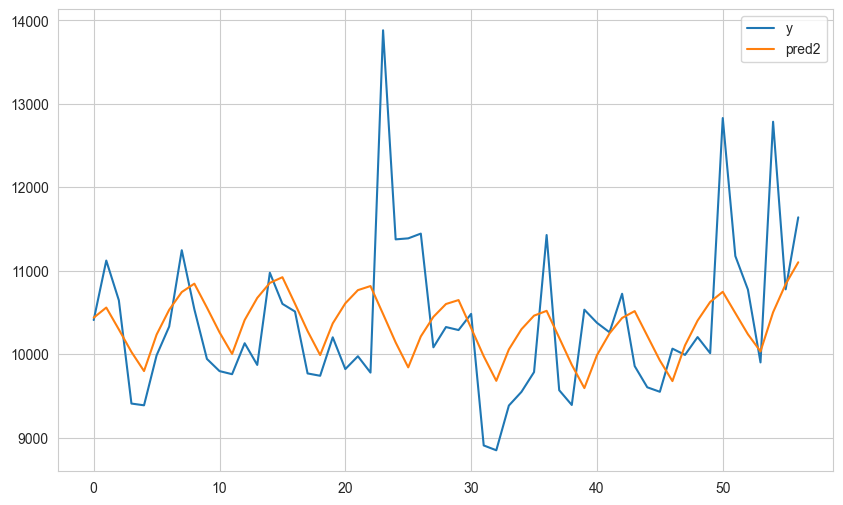

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

# Create a line plot for the four lines
sns.set_style("whitegrid")  # Optional: Set the style
plt.figure(figsize=(10, 6))  # Optional: Set the figure size

# Plot the lines     'ord','auto_pred1','auto_pred3','auto_pred4',
sns.lineplot(data=test1[['y', 'pred2']], dashes=False)

Mean Absolute Error (MAE): 618.0633833962531
Mean Squared Error (MSE): 719639.3541744635
Root Mean Squared Error (RMSE): 848.3155982147584
Mean Absolute Percentage Error (MAPE): 5.7567517068131275%
Weighted Mean Absolute Percentage Error (WMAPE): 5.960170272513962%


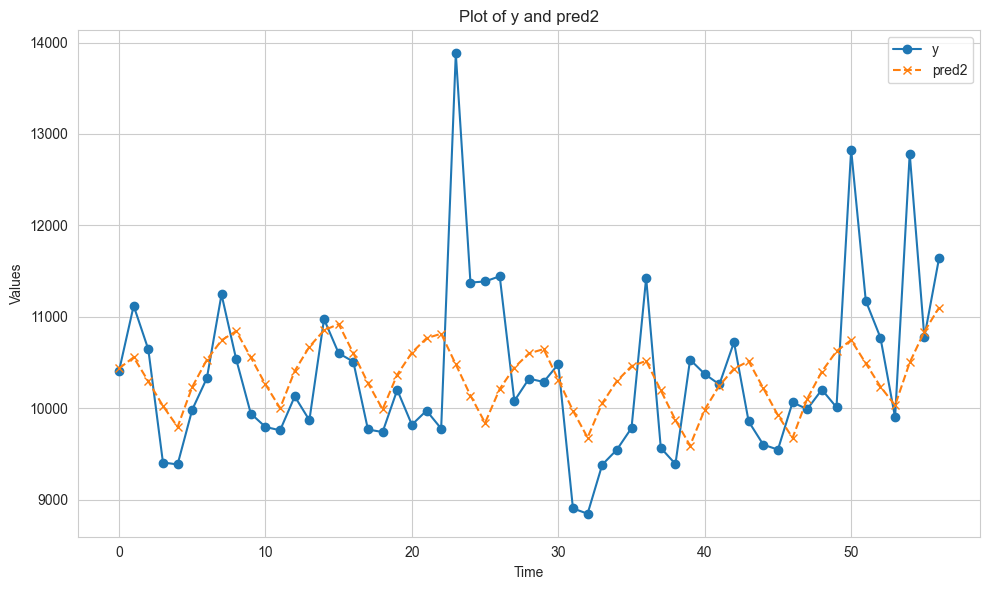

In [10]:
# Calculate accuracy metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test1['y'], test1['pred2'])
mse = mean_squared_error(test1['y'], test1['pred2'])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test1['y'] - test1['pred2']) / test1['y'])) * 100
wmape = np.sum(np.abs(test1['y'] - test1['pred2'])) / np.sum(test1['y']) * 100

# Print the accuracy metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')
print(f'Weighted Mean Absolute Percentage Error (WMAPE): {wmape}%')

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Plot the 'y' and 'pred2' columns
plt.plot(test1['y'], label='y', marker='o', linestyle='-')
plt.plot(test1['pred2'], label='pred2', marker='x', linestyle='--')

# Add labels and a legend
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Plot of y and pred2')
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
# User inputs a date in yyyy-mm-dd format
user_input_date_str = input("Enter a date in yyyy-mm-dd format: ")

# Convert the user input date string to a datetime object
from datetime import datetime
user_input_date = datetime.strptime(user_input_date_str, '%Y%m%d')

# Find the forecasted value for the user's input date
forecast_for_user_date = prediction2[prediction2['ds'] == user_input_date]['yhat'].values[0]

# Print the forecasted value for the user's input date
print(f"Forecasted Orders for {user_input_date_str}: {forecast_for_user_date}")


# 20230928

Forecasted Orders for 20230920: 10746.328777100978
